[2.0, 3.0]
[-2.0, 5.5]
LINES DO NOT INTERSECT
Calculating dot products with all other normals from other shapes for RED.
dot (red.blue)=-6.0
dot (red.yellow)=6.0
Calculating dot products with all other normals from other shapes for GREEN.
dot (green.blue)=6.0
dot (green.yellow)=-6.0
distance (red.blue) and midpoint=3.1622776601683795
distance (green.yellow) and midpoint=5.830951894845301


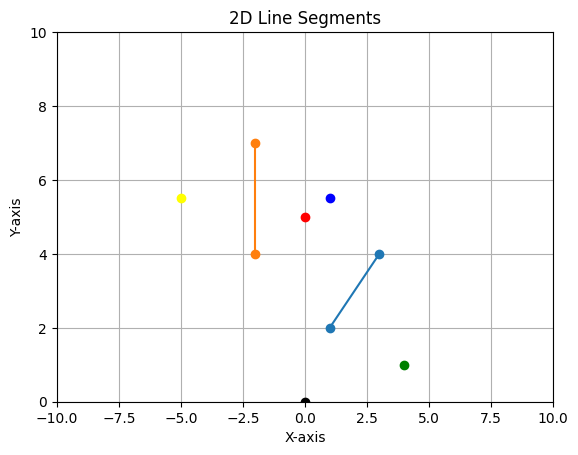

In [2]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

def calculate_distance(p1: list[float], p2: list[float] ) -> float:
    return sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Of the form [x1, x2, x3, x4], and [y1, y2, y3, y4]
def do_segments_intersect(x : list[float], y : list[float]) -> bool:
    [x1, x2, x3, x4] = x
    [y1, y2, y3, y4] = y

    if min(x1,x2) > max(x3,x4): return False

    a1 = (y1 - y2) / (x1 - x2)
    a2 = (y3 - y4) / (x3 - x4)
    b1 = y1 - a1*x1
    b2 = y3 - a2*x3

    if a1 == a2:
        return False

    Xa = (b2 - b1) / (a1 - a2)

    if ( (Xa < max( min(x1,x2), min(x3,x4) )) or (Xa > min( max(x1,x2), max(x3,x4) )) ):
        return False  # intersection is out of bound
    else:
        return True


# Define your line segments
x_segments = [[1.0, 3.0], [-2.0, -2.0]]
y_segments = [[2.0, 4.0], [7.0, 4.0]]

x1 = x_segments[0][0]
x2 = x_segments[0][1]
x3 = x_segments[1][0]
x4 = x_segments[1][1]

y1 = y_segments[0][0]
y2 = y_segments[0][1]
y3 = y_segments[1][0]
y4 = y_segments[1][1]

# Plot each line segment
for x_seg, y_seg in zip(x_segments, y_segments):
    plt.plot(x_seg, y_seg, marker='o')

# Figure out normal vectors and plot them for one line segment
dx = x2 - x1
dy = y2 - y1

dx2 = x4 - x3
dy2 = y4 - y3

midpoint = [(x1 + x2) / 2.0, (y1 + y2) / 2.0]
midpoint2 = [(x3 + x4) / 2.0, (y3 + y4) / 2.0]

print(midpoint)
print(midpoint2)

norm_1 = [-dy, dx]
norm_2 = [dy, -dx]

norm_3 = [-dy2, dx2]
norm_4 = [dy2, -dx2]

plt.plot(norm_1[0]+midpoint[0], norm_1[1]+midpoint[1], marker='o', color='red')
plt.plot(norm_2[0]+midpoint[0], norm_2[1]+midpoint[1], marker='o', color='green')
plt.plot(norm_3[0]+midpoint2[0], norm_3[1]+midpoint2[1], marker='o', color='blue')
plt.plot(norm_4[0]+midpoint2[0], norm_4[1]+midpoint2[1], marker='o', color='yellow')

plt.plot(0, 0, marker='o', color='black')

second_line_pt1 = [x_segments[1][0], y_segments[1][0]]
second_line_pt2 = [x_segments[1][1], y_segments[1][1]]

if do_segments_intersect([x_segments[0][0], x_segments[0][1], x_segments[1][0], x_segments[1][1]],
                         [y_segments[0][0], y_segments[0][1], y_segments[1][0], y_segments[1][1]]):
    print("LINES INTERSECT")
else:
    print("LINES DO NOT INTERSECT")

# This works way better--we just need to find the combo of normals that
# face each other
print("Calculating dot products with all other normals from other shapes for RED.")
print(f'dot (red.blue)={np.dot(norm_3, norm_1)}') # This is the correct one
print(f'dot (red.yellow)={np.dot(norm_4, norm_1)}') 

print("Calculating dot products with all other normals from other shapes for GREEN.")
print(f'dot (green.blue)={np.dot(norm_3, norm_2)}')
print(f'dot (green.yellow)={np.dot(norm_4, norm_2)}') # This is the correct one

# If the dot product is negative, we know the normals face opposite each other (which is what we want),
# but occasionally this means that we're on the backside of both lines (in the 2D case--and they 
# aren't facing eachother).
# To avoid this, we take all of the matched normals (3 and 4 in this case), and calculate their distance
# to the midline of our source geometry.  We then just take the minimum one.
print(f'distance (red.blue) and midpoint={calculate_distance(norm_3, midpoint)}') # Ultimately this is the correct one
print(f'distance (green.yellow) and midpoint={calculate_distance(norm_4, midpoint)}') 

# Set axis labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Line Segments')

ax = plt.gca()
plt.grid(True)
ax.set_xlim([-10, 10])
ax.set_ylim([0, 10])

# Show the plot
plt.show()
